In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


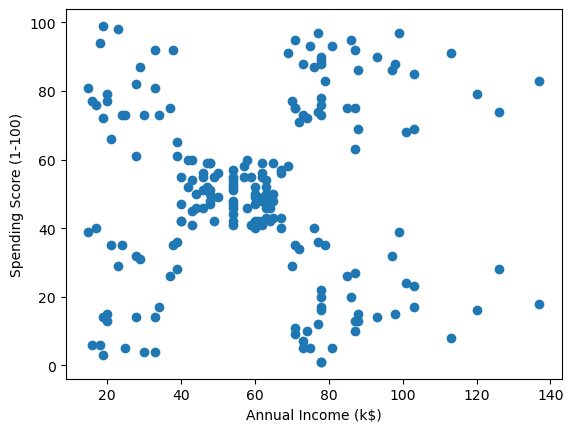

In [5]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [6]:
#bazı sütünların isimlerini değiştiriyoruz
df.rename(columns = {"Annual Income (k$)": "Income"}, inplace = True)
df.rename(columns = {"Spending Score (1-100)": "Score"}, inplace = True)

In [10]:
# verilerin normalize edilmesi gerekiyor bu işlem sklearn MinMaxScaler ile yapılır
scaler = MinMaxScaler()

scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])

scaler.fit(df[["Score"]])
df["Score"] = scaler.transform(df[["Score"]])

df.head()

,CustomerID,Income,Score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


## K değerinin belirlenmesi (Elbow yöntemi kullanarak)

In [16]:
k_range = range(1,11)

list_dist=[]

for k in k_range:
    kmeans_modelim = KMeans(n_clusters = k)
    kmeans_modelim.fit(df[["Income","Score"]])
    list_dist.append(kmeans_modelim.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


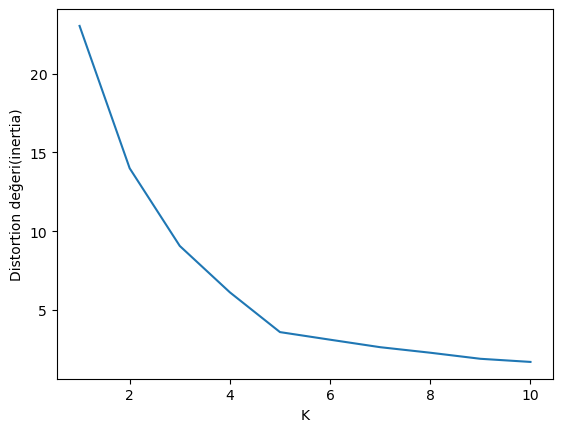

In [17]:
plt.xlabel("K")
plt.ylabel("Distortion değeri(inertia)")
plt.plot(k_range, list_dist)
plt.show()

## en iyi K değeri 5

In [18]:
# K = 5 içi K-Means modeli oluşturalım
kmeans_modelim = KMeans(n_clusters = 5)
y_predicted = kmeans_modelim.fit_predict(df[["Income","Score"]])

y_predicted

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [19]:
df["cluster"] = y_predicted
df.head()

,CustomerID,Income,Score,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,0
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,0
4,5,0.016393,0.397959,4


In [21]:
#centroidler 
kmeans_modelim.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

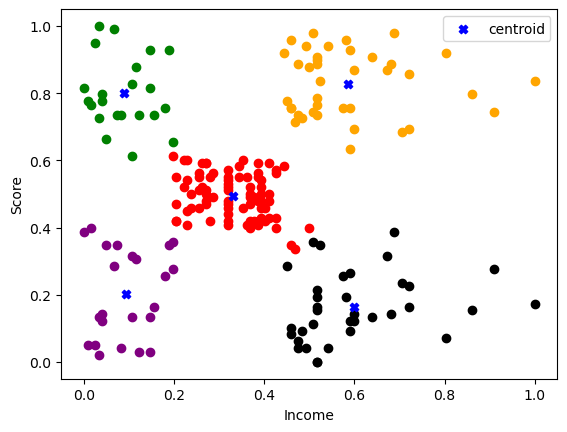

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

plt.xlabel("Income")
plt.ylabel("Score")

plt.scatter(df1["Income"],df1["Score"],color = "green")
plt.scatter(df2["Income"],df2["Score"],color = "red")
plt.scatter(df3["Income"],df3["Score"],color = "black")
plt.scatter(df4["Income"],df4["Score"],color = "orange")
plt.scatter(df5["Income"],df5["Score"],color = "purple")

plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color="blue", marker= "X",label="centroid")
plt.legend()
plt.show()
